# 3. Evaluating the performance

After training the models, it is good to verify that the training was successful before looking at the effect of variants.

Here, we will show how to evaluate the performance of multitask models. We use the lung-FACS dataset from the Tabula Muris as an example.

In [1]:
import os
import warnings
import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
from scipy.stats import pearsonr
import seaborn as sns



In [2]:
def corr_cp_sep(filename, cp):
    
    num_cp = len(cp)
        
    ct_res = pd.DataFrame(data=np.zeros((20,num_cp)), columns=cp)
    
    y_pred_all = []
    y_true_all = []
    
    # Iterate over the models
    for i in range(20):
        
        y_pred = 0
            
        for k in range(5):

            # Performance test data
            file = filename + str(i) + '/logs_dir' + str(k) + '/results_testdata_best.pkl'
            y = pd.read_pickle(file)
            y_true = np.asarray(y['y_true'])
            y_pred = y_pred + np.asarray(y['y_pred'])/5
        
        y_pred_all.extend(y_pred)
        y_true_all.extend(y_true)
        
        correlations=pd.DataFrame(np.hstack((y_true, y_pred))).corr().iloc[:num_cp,num_cp:]
        ct_res.loc[i] = np.diag(correlations.values)
        
    return ct_res, y_pred_all

In [3]:
# Cell population in the data
cp = pd.read_csv('../../Zenodo/mouse/TM_FACS_SM2/lung/pseudobulk.csv',index_col=0).columns[1:]

# Prefix of the directory/filenames with the results
filename = '../../Zenodo/mouse/TM_FACS_SM2/lung/cp_specific/logmean_zscore_multitask_'

lung_FACS, y_pred = corr_cp_sep(filename, cp)


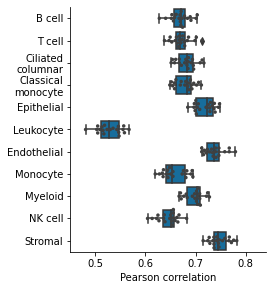

In [4]:
lung_FACS = pd.melt(lung_FACS, value_name='Correlation', var_name='Cell population')

plt.figure(figsize=(3.5,4.5))
sns.boxplot(data=lung_FACS, y='Cell population', x='Correlation', color=sns.color_palette('colorblind', as_cmap=True)[0])
g = sns.swarmplot(data=lung_FACS, y='Cell population', x='Correlation', color=".25", size=3.5)
sns.despine()
plt.ylabel('')
plt.xlabel('Pearson correlation')
g.set_yticklabels(['B cell', 'T cell', 'Ciliated\ncolumnar', 'Classical\nmonocyte', 'Epithelial',
                   'Leukocyte', 'Endothelial', 'Monocyte', 'Myeloid', 'NK cell', 'Stromal'])
plt.xlim([0.45, 0.84])
plt.show()